## 1. 데이터 불러오기

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_apartment = pd.read_csv('./data/서울시 부동산 실거래가 정보.csv', thousands=',', encoding='cp949')

#한글 폰트 설정 - mac 환경을 위한 폰트 설정
from matplotlib import rc
rc('font', family='AppleGothic')

/var/folders/3h/f28l_h7n3rdf1ffk62lr2qrw0000gn/T/ipykernel_2732/4113621508.py:6: DtypeWarning: Columns (7,15,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_apartment = pd.read_csv('./data/서울시 부동산 실거래가 정보.csv', thousands=',', encoding='cp949')


- 경고: 7, 15, 19, 20번째 컬럼의 데이터 형이 섞여 있음

## 2. 데이터 확인

In [186]:
df_apartment.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2023,11740,강동구,10700,암사동,1,대지,454,1,라온프라이빗(454-1),...,43500,40,27,4,NaN,NaN,2020,연립다세대,직거래,NaN
1,2023,11620,관악구,10100,봉천동,1,대지,100,336,대호빌라,...,20000,32,15,4,NaN,NaN,2002,연립다세대,중개거래,서울 관악구
2,2023,11440,마포구,12700,상암동,1,대지,1734,0,상암 한화 오벨리스크,...,12400,24,31,7,NaN,NaN,2013,오피스텔,직거래,NaN
3,2023,11710,송파구,10900,장지동,1,대지,901,0,위례24단지(꿈에그린),...,115500,60,0,6,NaN,NaN,2013,아파트,중개거래,서울 송파구
4,2023,11530,구로구,10200,구로동,1,대지,339,82,S.L.프라임빌,...,46400,59,39,3,NaN,NaN,2022,연립다세대,직거래,NaN


In [187]:
# 행 개수, 열 개수 살펴보기
df_apartment.shape

(2529709, 21)

사용할 데이터는 2529709개 행과 21개의 열을 가진 데이터

In [188]:
#컬럼 정보 살펴보기
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529709 entries, 0 to 2529708
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   접수연도              int64  
 1   자치구코드             int64  
 2   자치구명              object 
 3   법정동코드             int64  
 4   법정동명              object 
 5   지번구분              float64
 6   지번구분명             object 
 7   본번                object 
 8   부번                float64
 9   건물명               object 
 10  계약일               int64  
 11  물건금액(만원)          int64  
 12  건물면적(㎡)           float64
 13  토지면적(㎡)           float64
 14  층                 float64
 15  권리구분              object 
 16  취소일               float64
 17  건축년도              float64
 18  건물용도              object 
 19  신고구분              object 
 20  신고한 개업공인중개사 시군구명  object 
dtypes: float64(7), int64(5), object(9)
memory usage: 405.3+ MB


### 결측치 개수 확인

In [190]:
#회귀분석에 사용하지 않을 컬럼 제거
df_apartment = df_apartment[['접수연도', '자치구코드', '법정동코드', '지번구분', '계약일', '물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '층', '건축년도']]

In [191]:
# 결측치 확인
df_apartment.isnull().sum()

접수연도             0
자치구코드            0
법정동코드            0
지번구분        209381
계약일              0
물건금액(만원)         0
건물면적(㎡)          0
토지면적(㎡)     964814
층           209233
건축년도          7833
dtype: int64

- '지번구분' 컬럼과 '토지면적' 컬럼, '건축년도' 컬럼에 결측치가 있음

<Axes: >

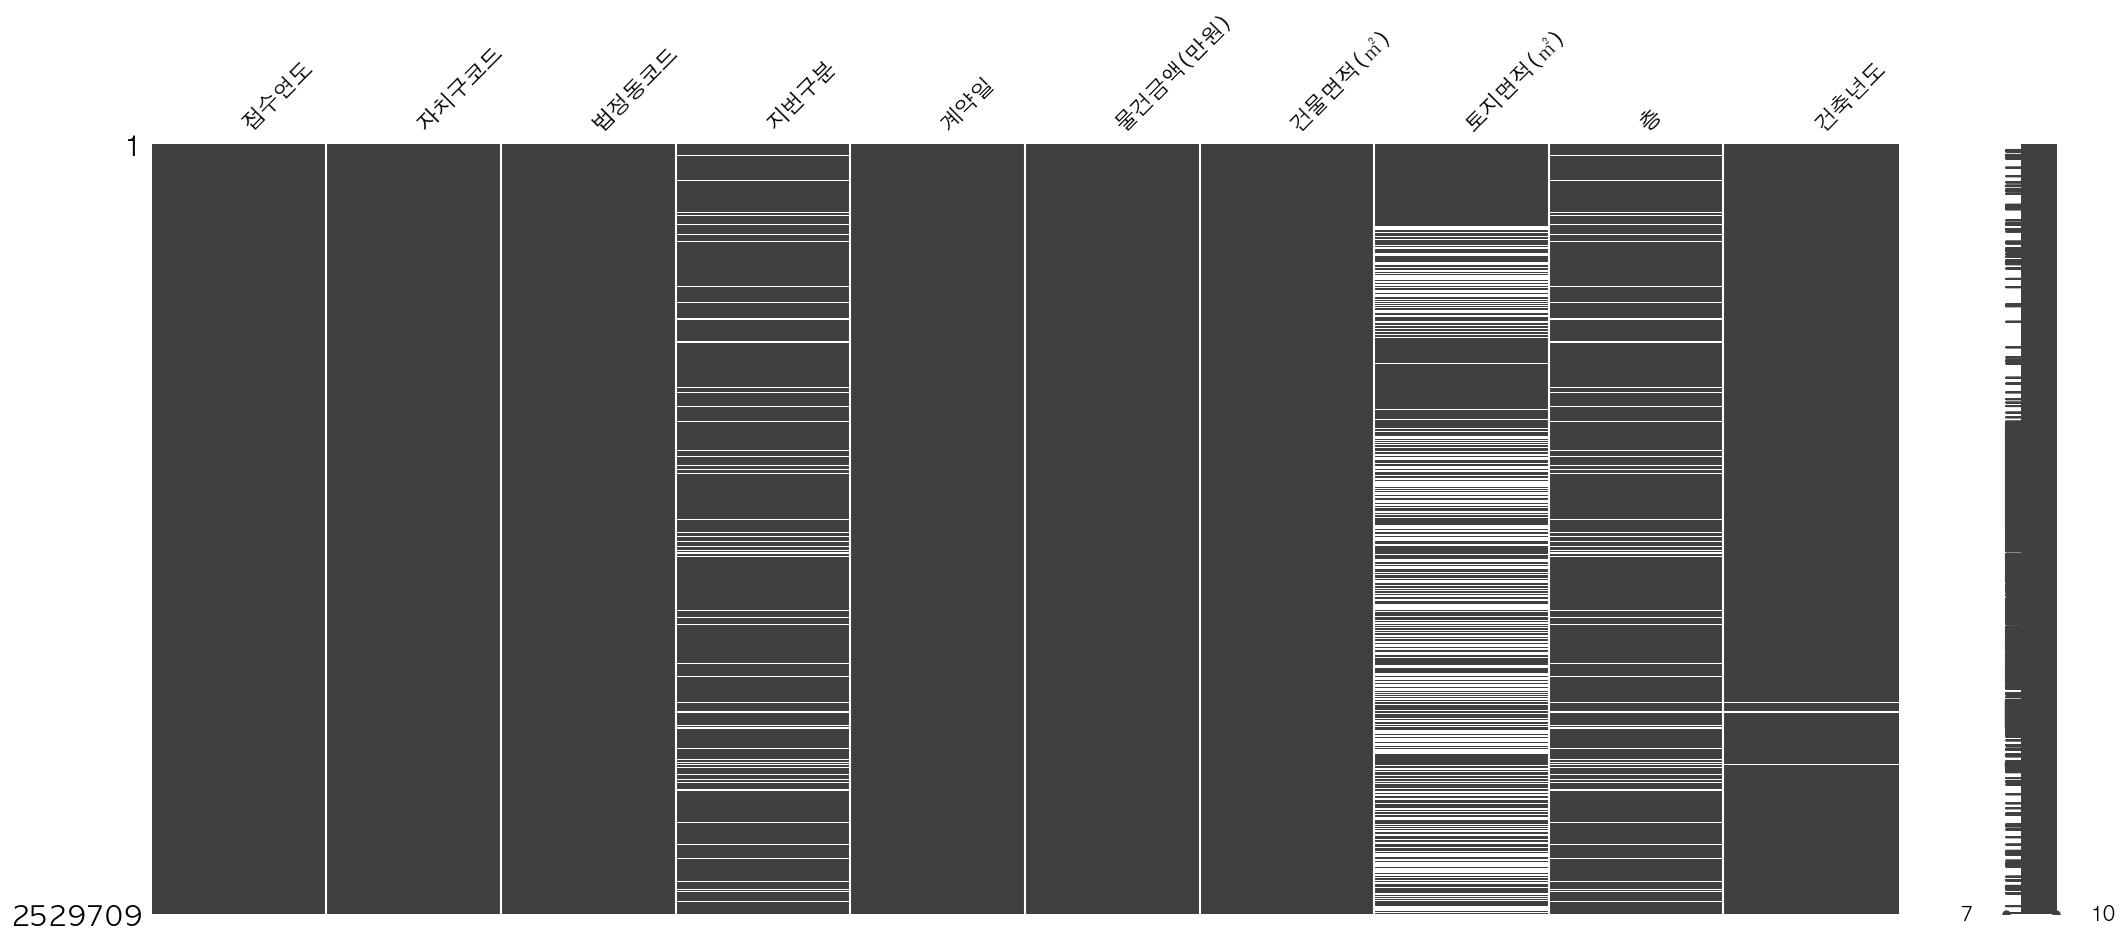

In [192]:
# 결측치 시각화
import missingno as msno

msno.matrix(df_apartment)

<Axes: >

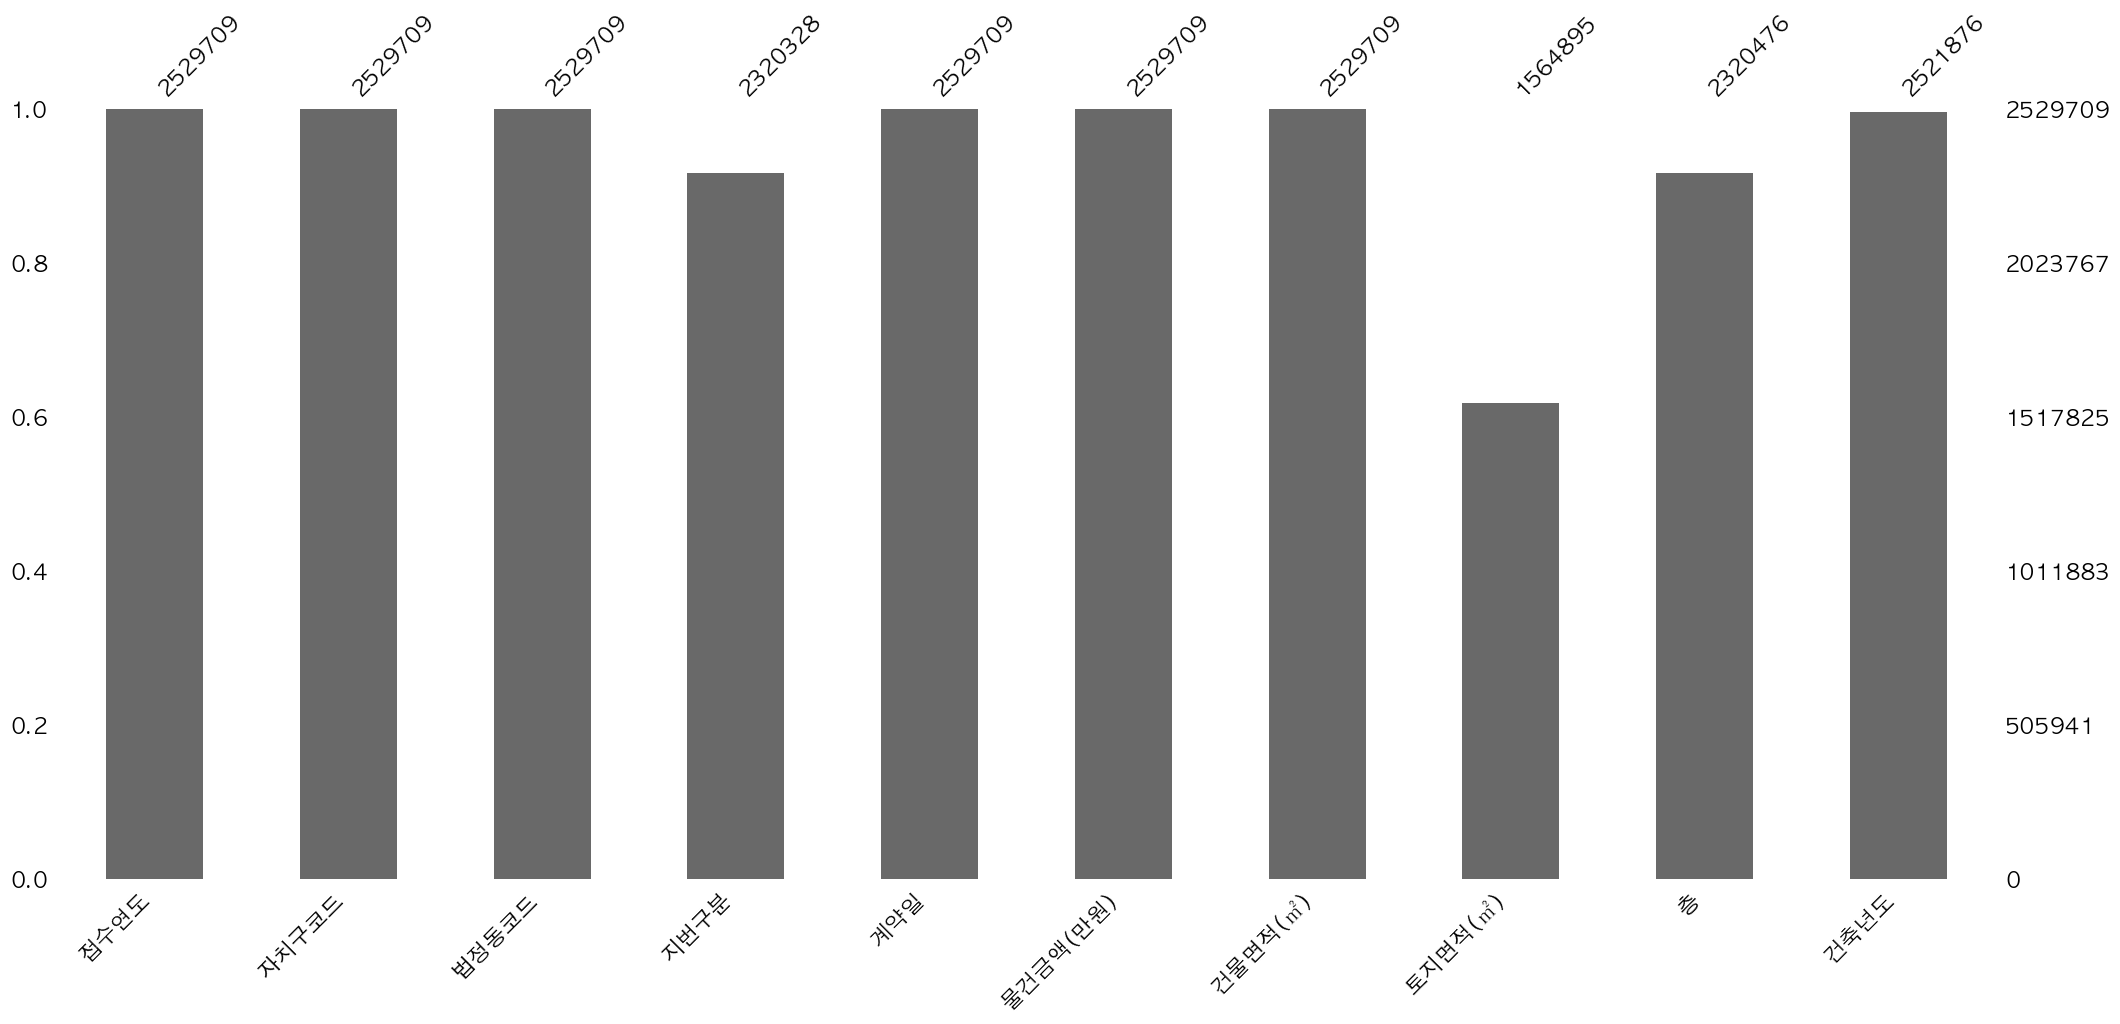

In [36]:
msno.bar(df_apartment)

'지번구분' 컬럼의 분포 확인

In [37]:
df_apartment['지번구분'].value_counts()

지번구분
1.0    2316425
3.0       2696
2.0       1207
Name: count, dtype: int64

- 값의 분포 형태를 보니 범주형 컬럼인 것으로 추정
- 대다수의 값이 '1.0'에 몰려 있음 -> 최빈값인 '1.0'으로 결측치를 대체

'층' 컬럼의 기술통계량 확인

Text(0.5, 1.0, '층 컬럼의 분포 히스토그램')

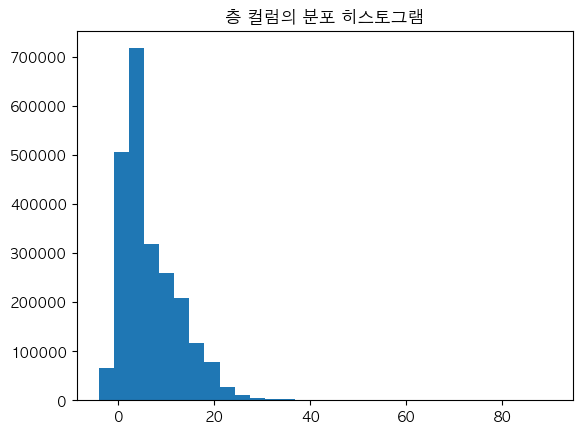

In [193]:
plt.hist(df_apartment['층'], bins=30)

plt.title('층 컬럼의 분포 히스토그램')

In [194]:
#기술통계량 보기
df_apartment['층'].describe().round(2)

count   2320476
mean          7
std           6
min          -4
25%           3
50%           5
75%          10
max          90
Name: 층, dtype: float64

'토지면적' 컬럼의 분포 확인

In [195]:
df_apartment['토지면적(㎡)'].value_counts()

토지면적(㎡)
0       356023
99        3702
116       3008
132       2986
119       2701
         ...  
122          1
349          1
110          1
4            1
1341         1
Name: count, Length: 15683, dtype: int64

#### 결측치 처리

In [196]:
# '건축년도' 컬럼에서 결측치가 있는 행 제거
df_apartment = df_apartment.dropna(subset=['지번구분', '건축년도'], how='any', axis=0)

# '지번구분' 컬럼의 결측치는 최빈값인 1로 대체
df_apartment['지번구분'] = df_apartment['지번구분'].fillna(1)

# '층' 컬럼의 결측치는 중앙값으로 대체
df_apartment['층'] = df_apartment['층'].fillna(df_apartment['층'].median())

# 결측치 확인
df_apartment.isnull().sum()

접수연도             0
자치구코드            0
법정동코드            0
지번구분             0
계약일              0
물건금액(만원)         0
건물면적(㎡)          0
토지면적(㎡)     964790
층                0
건축년도             0
dtype: int64

- '토지면적' 컬럼의 결측치 처리는 보류. 종속변수인 '물건금액' 컬럼과의 상관계수를 확인한 뒤 결정

## 3. 데이터 분포 확인

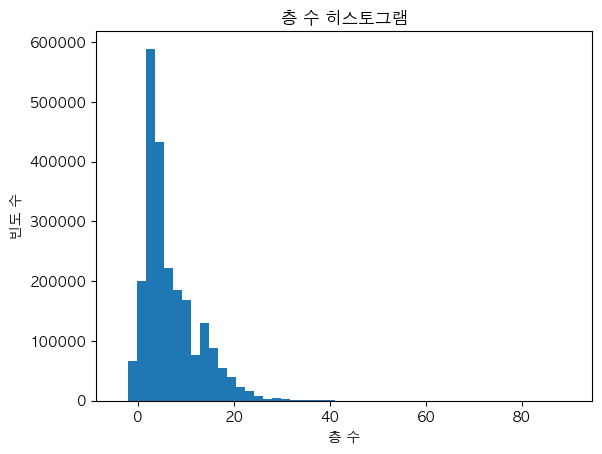

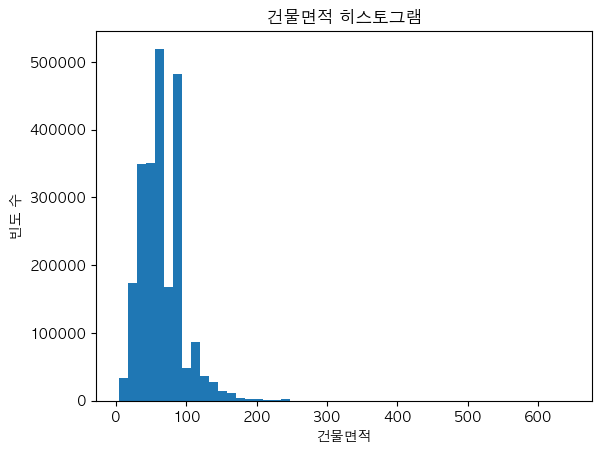

In [200]:
# '층', '전용면적', '건축년도' 컬럼 히스토그램 시각화

plt.hist(df_apartment['층'], bins=50)
plt.title('층 수 히스토그램')
plt.xlabel('층 수')
plt.ylabel('빈도 수')
plt.show()

plt.hist(df_apartment['건물면적(㎡)'], bins=50)
plt.title('건물면적 히스토그램')
plt.xlabel('건물면적')
plt.ylabel('빈도 수')
plt.show()

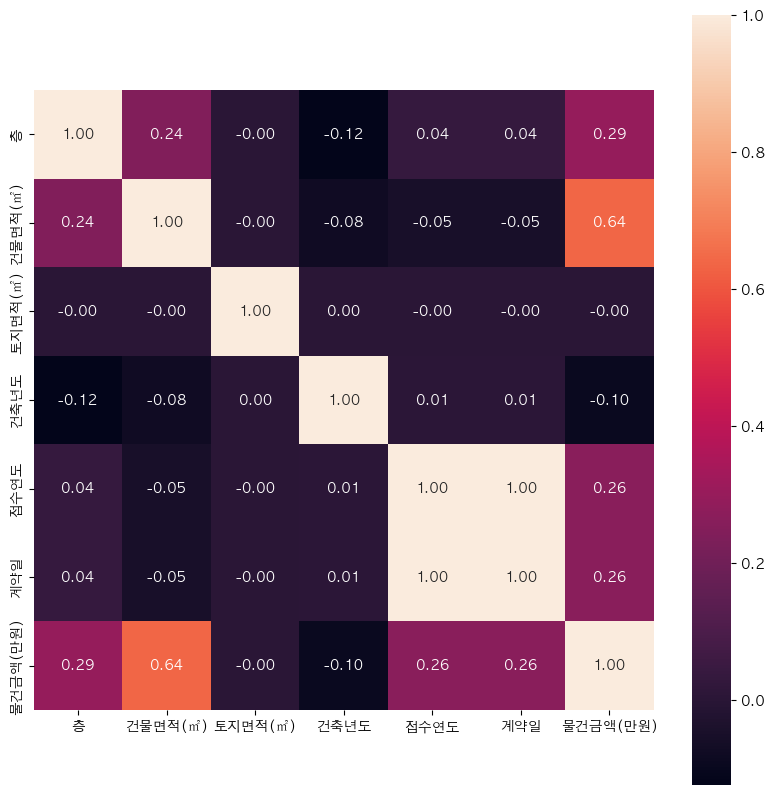

In [201]:
# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 10))

sns.heatmap(df_apartment[['층', '건물면적(㎡)', '토지면적(㎡)', '건축년도', '접수연도', '계약일', '물건금액(만원)']].corr(), annot=True, fmt='.2f', square=True)
plt.show()

- 독립변수로 사용할 컬럼들의 종속변수와의 상관관계가 그다지 높지 않음
- 선형회귀 모델이 충분한 설명력을 갖지 못할 것으로 추정

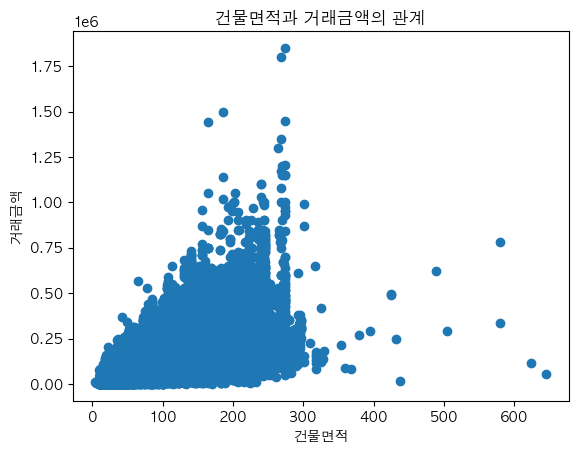

In [202]:
# '거래금액'과 '전용면적'의 관계 시각화

plt.scatter(df_apartment['건물면적(㎡)'], df_apartment['물건금액(만원)'])
plt.title('건물면적과 거래금액의 관계')
plt.xlabel('건물면적')
plt.ylabel('거래금액')
plt.show()

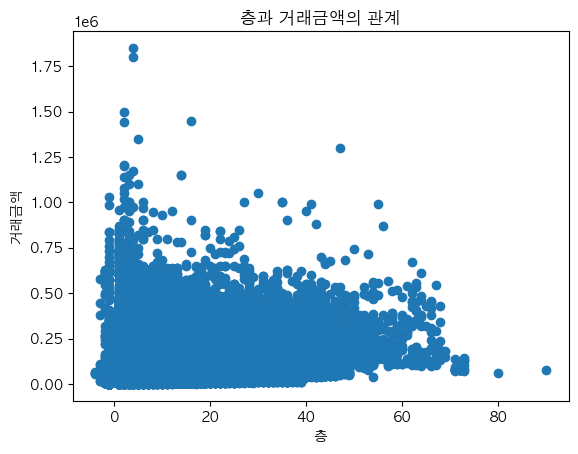

In [203]:
# '거래금액'과 '층'의 관계 시각화

plt.scatter(df_apartment['층'], df_apartment['물건금액(만원)'])
plt.title('층과 거래금액의 관계')
plt.xlabel('층')
plt.ylabel('거래금액')
plt.show()

- 상관계수에서 유추할 수 있듯 각각의 독립변수와 종속변수 사이의 분포를 시각화했을 때에도 큰 상관성이 보이지 않음

## 5. 선형회귀 모델 구축

In [205]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df_apartment[['층', '건물면적(㎡)', '건축년도', '접수연도', '자치구코드', '법정동코드', '지번구분', '계약일']].values
Y = df_apartment['물건금액(만원)']

#훈련-검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

model.fit(X_train, Y_train)

LinearRegression()

In [206]:
coef = model.coef_               # 직선의 기울기(a)
intercept = model.intercept_     # 직선의 절편(b)
score = model.score(X_test, Y_test)        # 추정된 회귀직선의 정확도(결정계수 r2)
# 회귀직선식 출력
print(f"다중선형회귀선 식:\n y = {intercept:.2f}", end="")
for i, c in enumerate(coef):
    print(f" + {c:.2f}x{i+1}", end="")
#모델 평가 지표

from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f"\n선형회귀모델의 관계점수(R2): {score: .2f}")
print(f"선형회귀모델의 평균제곱오차(MSE): {mean_squared_error(Y_test, model.predict(X_test)): .2f}")
print(f"선형회귀모델의 평균절대오차(MAE): {mean_absolute_error(Y_test, model.predict(X_test)): .2f}")
print(f"선형회귀모델의 RMSE(Root Mean Squared Error): {np.sqrt(mean_squared_error(Y_test, model.predict(X_test))): .2f}")

다중선형회귀선 식:
 y = -5240191.35 + 892.81x1 + 824.37x2 + -4.76x3 + 1220.57x4 + 39.71x5 + 1.84x6 + -2697.18x7 + 0.11x8
선형회귀모델의 관계점수(R2):  0.54
선형회귀모델의 평균제곱오차(MSE):  752993352.35
선형회귀모델의 평균절대오차(MAE):  16823.63
선형회귀모델의 RMSE(Root Mean Squared Error):  27440.72


- 선형회귀 모델의 설명력을 나타내는 관계점수(R2) 값이 0.54로 중간 정도의 설명력을 보임. 

#### 모델이 충분한 설명력을 갖지 못하는 이유

> 부동산 가격은 선형회귀모델의 한계상 독립변수로 포함하기 어려운 '지역' 정보에 영향을 많이 받음. 같은 평수와 같은 층수더라도 지역별로 가격의 편차가 매우 큼

위 이유가 크게 작용했을 것으로 추정

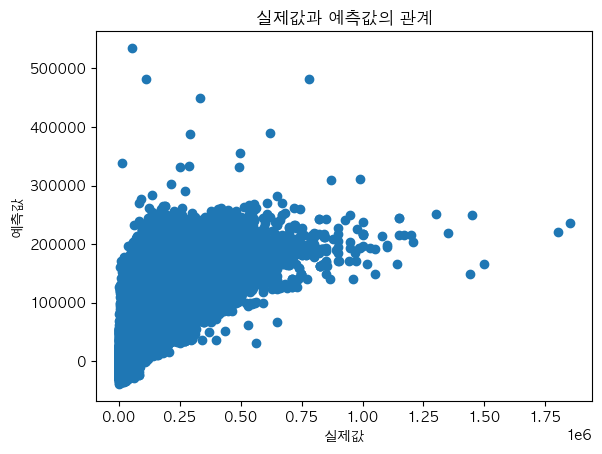

In [117]:
predict = model.predict(X)

plt.scatter(Y, predict)

plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("실제값과 예측값의 관계")
plt.show()

#### 랜덤포레스트 모델의 성능

In [171]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor()

model_RF.fit(X, Y)

RandomForestRegressor()

In [184]:
score = model_RF.score(X_test, Y_test)
predict = model_RF.predict(X)

print(f"랜덤포레스트 모델의 관계점수(R2): {score: .2f}")
print(f"랜덤포레스트 모델의 평균제곱오차(MSE): {mean_squared_error(Y, predict): .2f}")
print(f"랜덤포레스트 모델의 평균절대오차(MAE): {mean_absolute_error(Y, predict): .2f}")
print(f"랜덤포레스트 모델의 RMSE(Root Mean Squared Error): {np.sqrt(mean_squared_error(Y, predict)): .2f}")

랜덤포레스트 모델의 관계점수(R2):  1.00
랜덤포레스트 모델의 평균제곱오차(MSE):  7569299.25
랜덤포레스트 모델의 평균절대오차(MAE):  1179.40
랜덤포레스트 모델의 RMSE(Root Mean Squared Error):  2751.24


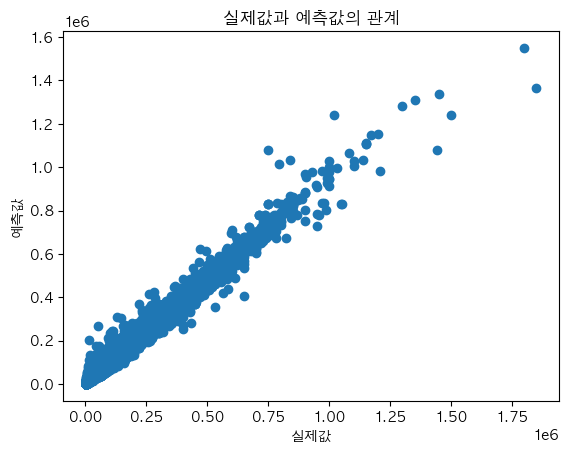

In [174]:
plt.scatter(Y, predict)

plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("실제값과 예측값의 관계")
plt.show()

#### XGBoost 모델의 성능

In [177]:
from xgboost import XGBRegressor

model_XGB = XGBRegressor()

model_XGB.fit(X, Y)

model_XGB.score(X, Y)

0.9225328817004247

In [178]:
score = model_XGB.score(X, Y)
predict = model_XGB.predict(X)

print(f"XGBoost 모델의 관계점수(R2): {score: .2f}")
print(f"XGBoost 모델의 평균제곱오차(MSE): {mean_squared_error(Y, predict): .2f}")
print(f"XGBoost 모델의 평균절대오차(MAE): {mean_absolute_error(Y, predict): .2f}")
print(f"XGBoost 모델의 RMSE(Root Mean Squared Error): {np.sqrt(mean_squared_error(Y, predict)): .2f}")

XGBoost 모델의 관계점수(R2):  0.92
XGBoost 모델의 평균제곱오차(MSE):  127000040.21
XGBoost 모델의 평균절대오차(MAE):  6431.67
XGBoost 모델의 RMSE(Root Mean Squared Error):  11269.43


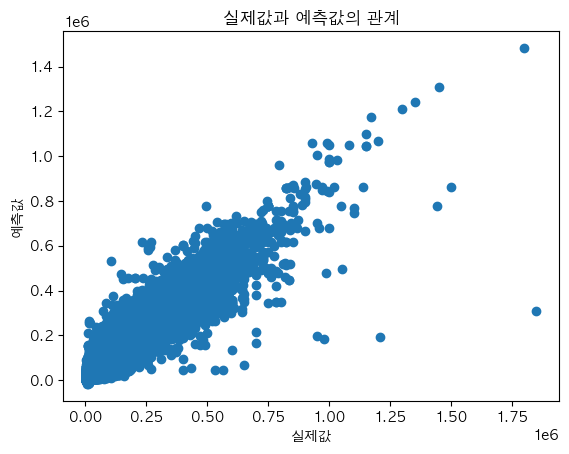

In [179]:
plt.scatter(Y, predict)

plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("실제값과 예측값의 관계")
plt.show()

## 6. 모델을 사용한 예측

In [165]:
price_predict = model.predict([[9, 70.87 , 2013, 2023, 11240, 10900,1, 20231006]])[0] * 10000

price_predict = format(int(price_predict), ',') 

print(f'서울 송파구 장지동 송파위례24단지꿈에그린아파트 9층의 거래금액 예측값: {price_predict}원')

서울 송파구 장지동 송파위례24단지꿈에그린아파트 9층의 거래금액 예측값: 612,511,302원


In [176]:
price_predict = model_RF.predict([[9, 70.87 , 2013, 2023, 11240, 10900,1, 20231006]])[0] * 10000

price_predict = format(int(price_predict), ',') 

print(f'서울 송파구 장지동 송파위례24단지꿈에그린아파트 9층의 거래금액 예측값: {price_predict}원')

서울 송파구 장지동 송파위례24단지꿈에그린아파트 9층의 거래금액 예측값: 576,824,600원


In [180]:
price_predict = model_XGB.predict([[9, 70.87 , 2013, 2023, 11240, 10900,1, 20231006]])[0] * 10000

price_predict = format(int(price_predict), ',') 

print(f'서울 송파구 장지동 송파위례24단지꿈에그린아파트 9층의 거래금액 예측값: {price_predict}원')

서울 송파구 장지동 송파위례24단지꿈에그린아파트 9층의 거래금액 예측값: 832,852,812원
